In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = "mugilandeiveegan"
os.environ['KAGGLE_KEY'] = "82639f84953138ec4944278fc14f7951"
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 53.6MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.9MB/s]


In [3]:
from zipfile import ZipFile

file_name = '/content/chest-xray-pneumonia.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
test_p="/content/chest_xray/test/PNEUMONIA"
test_n="/content/chest_xray/test/NORMAL"
train_p="/content/chest_xray/train/PNEUMONIA"
train_n="/content/chest_xray/train/NORMAL"
val_p="/content/chest_xray/val/PNEUMONIA"
val_n="/content/chest_xray/val/NORMAL"

In [ ]:
print(len(os.listdir(train_p)))

3875


In [ ]:
print(len(os.listdir(train_n)))
print("test_p",len(os.listdir(test_p)))
print("test_n",len(os.listdir(test_n)))
print("val_p",len(os.listdir(val_p)))
print("val_n",len(os.listdir(val_n)))

1341
test_p 390
test_n 234
val_p 8
val_n 8


In [ ]:
p_im=os.listdir(train_p)

In [ ]:
from PIL import Image

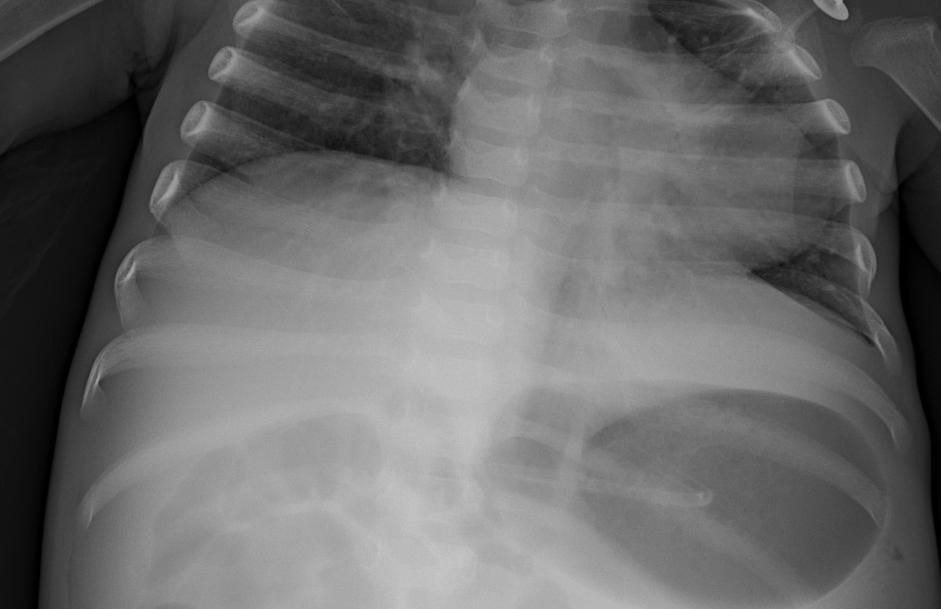

In [ ]:
Image.open(train_p +"/person1142_virus_1892.jpeg")

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir="/content/chest_xray/train"
data_gen=ImageDataGenerator(1/255.0)

In [ ]:
train_gen=data_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [ ]:
print(train_gen)

In [ ]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
labels = ['pneu','nor']
img_size=200
def get_training_data(data_dir):
    data=[]
    for label in labels:
        path=os.path.join(data_dir,label)
        class_num=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_arr=cv2.resize(img_arr,(img_size,img_size))
                data.append([resized_arr,class_num])
            except Exception as e:
                print(e)
    return np.array(data)                



In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_training_data('/content/chest_xray/train')
test = get_training_data('/content/chest_xray/test')
val = get_training_data('/content/chest_xray/val')

In [8]:
train.shape

(5216, 2)

In [12]:
d=0
c=0

for i,j in test:
    if j==1:
      c=c+1
    else :
      d=d+1   

In [13]:
c

234

In [7]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


NORMAL


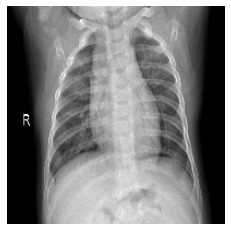

In [9]:
plt.imshow(train[5158][0], cmap='gray')
plt.axis('off')
print(labels[train[5158][1]])

In [10]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
for feature, label in val:
    X.append(feature)
    y.append(label)


# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [ ]:
import numpy as np

In [ ]:
a=np.array([[[1,2,3],[4,5,6],[7,8,9]]])



In [ ]:
a.shape

(1, 1, 3, 3)

In [ ]:
x=a.reshape(-1,3,3,1)

In [ ]:
x.shape

(1, 3, 3, 1)

In [ ]:
X_train.shape

(3747, 200, 200, 1)

In [11]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [12]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

In [19]:
len(X_train)

3747

In [13]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 256)     2560      
_________________________________________________________________
activation (Activation)      (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 256)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 256)     400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      147520    
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

In [15]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=10), callbacks=[early_stop], validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
375/375 [==============================] - 25s 67ms/step - loss: 0.6482 - acc: 0.7070 - val_loss: 0.5741 - val_acc: 0.7407
Epoch 2/15
375/375 [==============================] - 24s 65ms/step - loss: 0.5292 - acc: 0.7417 - val_loss: 0.4172 - val_acc: 0.7503
Epoch 3/15
375/375 [==============================] - 25s 65ms/step - loss: 0.4529 - acc: 0.7750 - val_loss: 0.3844 - val_acc: 0.7983
Epoch 4/15
375/375 [==============================] - 25s 66ms/step - loss: 0.3907 - acc: 0.8177 - val_loss: 0.2885 - val_acc: 0.8751
Epoch 5/15
375/375 [==============================] - 25s 66ms/step - loss: 0.3551 - acc: 0.8319 - val_loss: 0.2765 - val_acc: 0.8837
Epoch 6/15
375/375 [==============================] - 24s 65ms/step - loss: 0.3407 - acc: 0.8505 - val_loss: 0.2653 - val_acc: 0.8858
Epoch 7/15
375/375 [==============================] - 25s 65ms/step - loss: 0.3121 - acc: 0.8604 - val_loss: 0.2240 - val_acc: 0.9061
Epoch 8/15
375/375 [==============================] - 25s 66ms

In [16]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 3s 77ms/step - loss: 0.2092 - acc: 0.9147


[0.20919285714626312, 0.914675772190094]

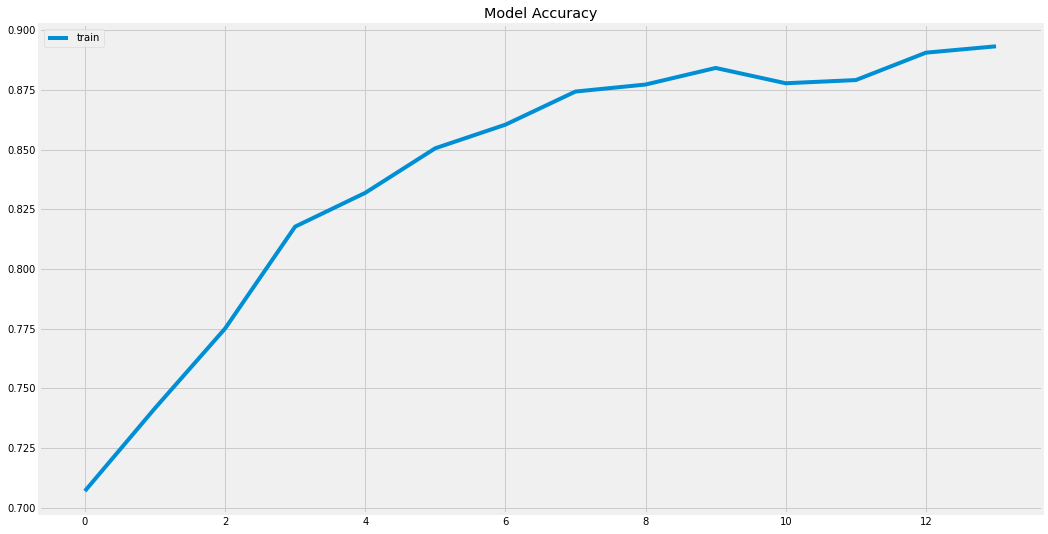

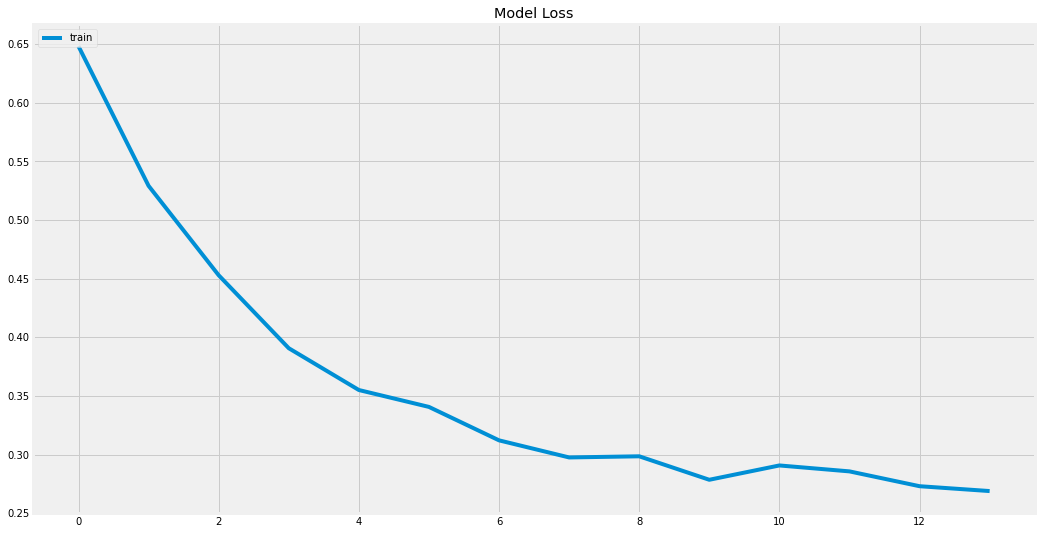

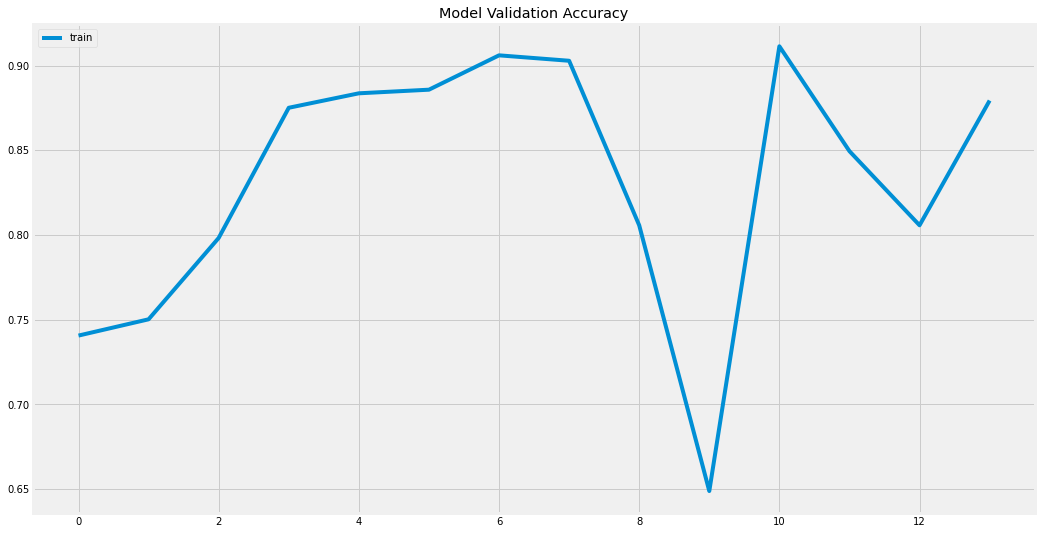

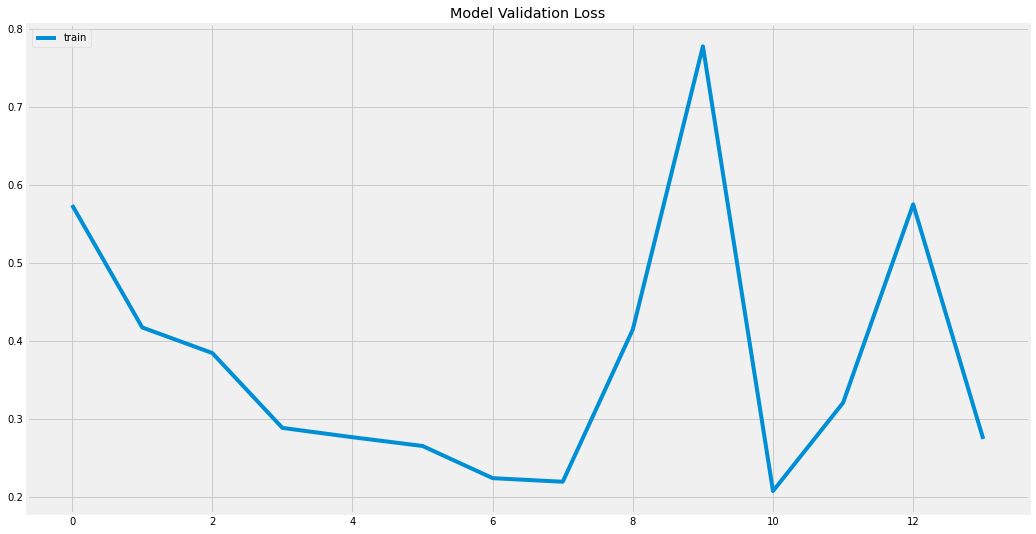

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['acc'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [18]:
pred = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)


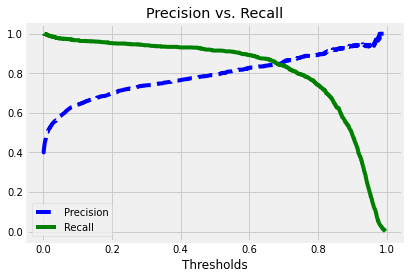

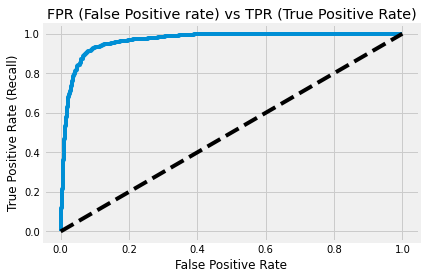

In [20]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)
plot_roc(fpr, tpr)

In [21]:
predictions = model.predict(X_test)

In [55]:
d4=X_val[2]

In [56]:
d4=d4[np.newaxis,:]

In [57]:
prediction=model.predict(d4)

In [39]:
threshold = thresholds[np.argmax(precisions >= 0.80)]

In [1]:
y_test[2]

NameError: ignored

In [58]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in prediction:
    if i >= threshold:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [59]:
binary_predictions[0]

1

In [113]:
lable[int(prediction)]

'p'

In [44]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9189419795221843
Precision on testing set: 0.9452887537993921
Recall on testing set: 0.8015463917525774


[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

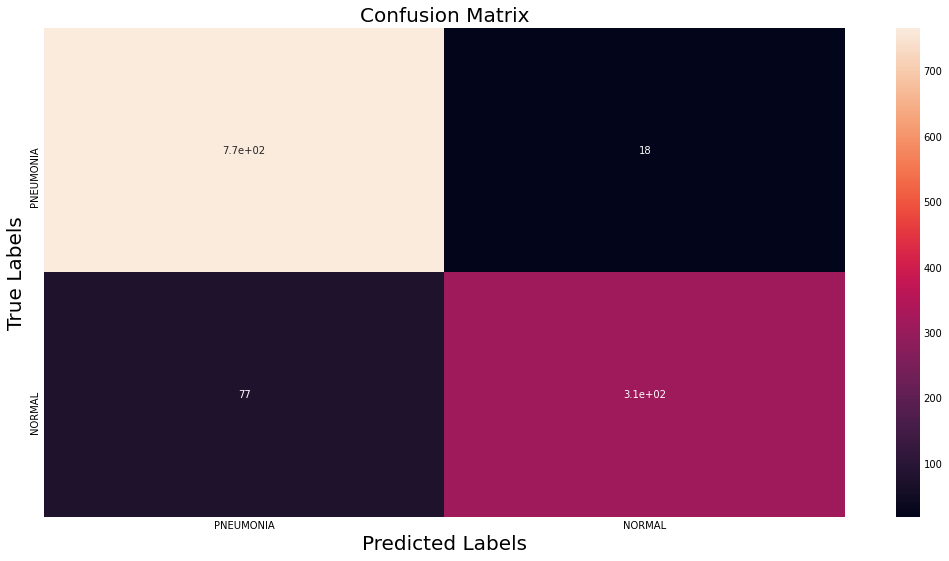

In [45]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


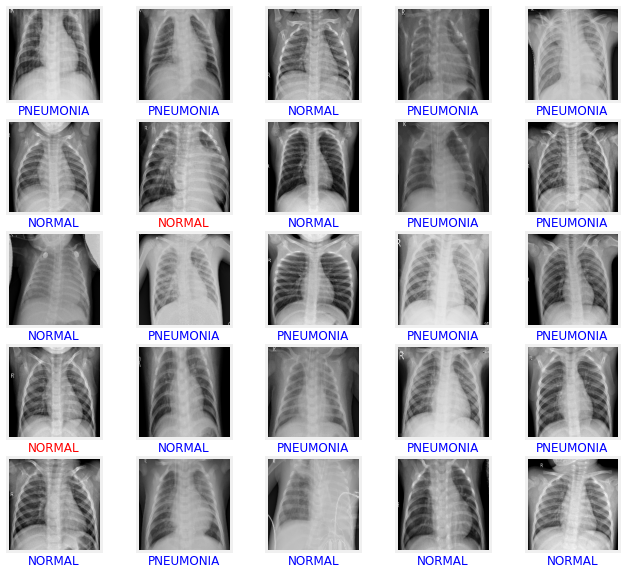

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train.reshape(-1, img_size, img_size)[i], cmap='gray')
    if(binary_predictions[i]==y_test[i]):
        plt.xlabel(labels[binary_predictions[i]], color='blue')
    else:
        plt.xlabel(labels[binary_predictions[i]], color='red')
plt.show()


In [48]:
 model.save('/content/drive/My Drive/pneumoniamugi.h5')